In [1]:
# Car Racing Environment
from car_racing import CarRacingEnvironment
import numpy as np

# Open AI gym
import gym

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:39: DeprecationWarning: HAMMING is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.HAMMING instead.
  'hamming': pil_image.HAMMING,
c:\ProgramData\Anaconda3\envs\tf\lib\site

In [2]:
# Parameters
frame_stack_num = 3,
memory_size     = 5000,
gamma           = 0.95,  # discount rate
epsilon         = 1.0,   # exploration rate
epsilon_min     = 0.1,
epsilon_decay   = 0.9999,
learning_rate   = 0.001

action_space    = [
            (-1, 1, 0.2), (0, 1, 0.2), (1, 1, 0.2), #           Action Space Structure
            (-1, 1,   0), (0, 1,   0), (1, 1,   0), #        (Steering Wheel, Gas, Break)
            (-1, 0, 0.2), (0, 0, 0.2), (1, 0, 0.2), # Range        -1~1       0~1   0~1
            (-1, 0,   0), (0, 0,   0), (1, 0,   0)
        ]

action_space = [0, 1, 2, 3, 4]

def build_model():
    # Neural Net for Deep-Q learning Model
    input_images = tf.keras.layers.Input(((96, 96, 3)))
    #input_sensors = tf.keras.layers.Input(((6, 3)))
    
    x = Conv2D(filters=6, kernel_size=(7, 7), strides=3, activation='relu', input_shape=(96, 96, 3))(input_images)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=12, kernel_size=(4, 4), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(216, activation='relu')(x)
    #output1 = Dense(16, activation='relu')(x) # New Addition

    #concatted = tf.keras.layers.Concatenate()([output1, input_sensors[:,:,0]])
    #x = Dense(16, activation='relu')(concatted)

    outputs = Dense(len(action_space), activation=None)(x)

    model = tf.keras.Model(input_images, outputs)
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, epsilon=1e-7))
    return model


model = build_model()

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         888       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        1164      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 432)               0     

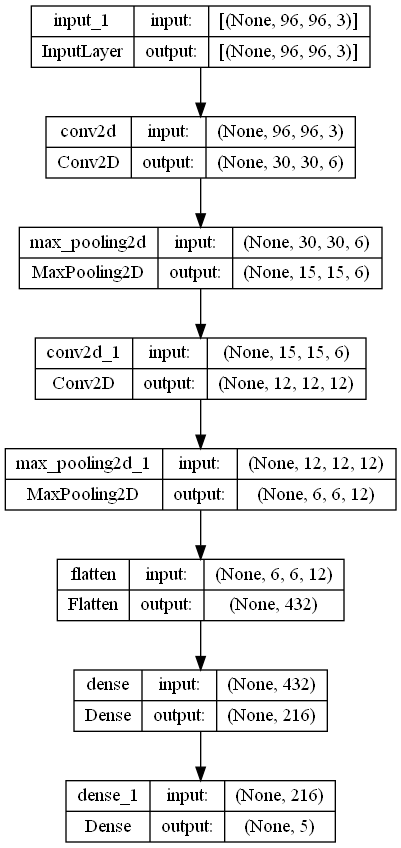

In [4]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [5]:
# Set weights
model.load_weights('trained_networks/agent_011.h5')

In [6]:
act_values = model.predict(np.expand_dims(observation, axis=0))
action_index = np.argmax(act_values[0])

1/1 [==============================] - 10s 10s/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         888       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        1164      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 216)               9

In [8]:
np.array(model.predict(np.expand_dims(observation, axis=0), verbose=0)[0])/100

array([117.57352 , 167.11661 ,  45.165848, 130.52705 ,  86.707756,
        87.269554, 179.42297 , 149.10497 ,  60.82204 , 157.84099 ,
       140.84491 ,  99.12678 ], dtype=float32)

In [9]:
model.save('trained_networks/agent_012_trim.h5')

In [10]:
from keras.models import Model

model2 = Model(model.input, model.layers[-2].output)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         888       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        1164      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 432)               0     

In [11]:
model2.save('trained_networks/agent_011_trim.h5')

In [12]:
model3 = tf.keras.models.load_model('trained_networks/agent_011_trim.h5')
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         888       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        1164      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 432)               0     

In [13]:
len(list(model3.predict(np.expand_dims(observation, axis=0), verbose=0)[0]))

216

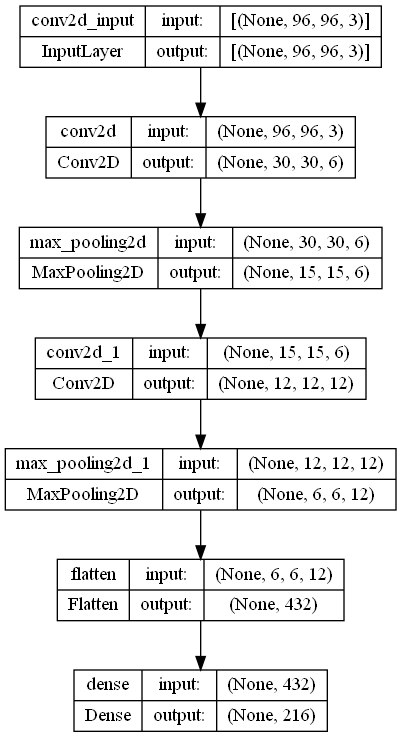

In [14]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model3, to_file=dot_img_file, show_shapes=True)

# Test All Agents

In [2]:
import gym

import numpy as np
from tqdm import tqdm

# First set of experiments
from agent import ExpectedSarsaAgent
from car_racing import CarRacingEnvironment
from rl_glue import RLGlue

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\utils\image_utils.py:39: DeprecationWarning: HAMMING is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.HAMMING instead.
  'hamming': pil_image.HAMMING,
c:\ProgramData\Anaconda3\envs\tf\lib\site

In [1]:
agent_name = 'agent_004_albon'
trained_weights = np.load(f'trained_networks/{agent_name}.npy', allow_pickle=True)

current_agent = ExpectedSarsaAgent
current_env = CarRacingEnvironment

# Experiment parameters
experiment_parameters = {
    "num_runs" : 1,
    "num_episodes" : 1000,
    "timeout" : 1000, # timestep limit (set to 500 as default)
}

# Environment parameters
environment_parameters = {}

# Agent parameters
agent_parameters = {
    'network_config': {
        'state_dim': 6, # State Dimension (number of inputs)
        'num_hidden_units_1': 16, #
        #'num_hidden_units_2': 16, #
        'num_actions': 5 # Action Space (number of outputs)
    },
    'optimizer_config': {
        'step_size': 1e-4, # 1e-3
        'beta_m': 0.9,
        'beta_v': 0.999, # 0.999
        'epsilon': 1e-8
    },
    'replay_buffer_size': 10000,
    'minibatch_sz': 64,
    'num_replay_updates_per_step': 8,
    'gamma': 0.99,
    'tau': 0.005 # 0.001
}

rl_glue = RLGlue(current_env, current_agent)
env_info = {}
agent_info = agent_parameters
agent_info["seed"] = 0
agent_info["network_config"]["seed"] = 0
env_info["seed"] = 0

rl_glue.rl_init(agent_info, env_info)
rl_glue.agent.network.weights = trained_weights

NameError: name 'np' is not defined

In [8]:
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]

seed_num = seed_nums[0]

scores = []


for seed_num in seed_nums:
    # Start Environment
    rl_glue.environment.env_init()
    rl_glue.environment.rand_generator = np.random.RandomState(4) # 2, 4, 9, 21

    # Change tau (if needed)
    rl_glue.agent.tau = 0.0001
    time_steps = 1000

    observation = rl_glue.environment.env_start()

    rl_glue.environment.env.reset(seed=seed_num) # new

    transformed_obs = rl_glue.transform_state(observation)
    episode_reward = 0

    for i in tqdm(range(time_steps)):
        
        # Select Action
        action = rl_glue.agent.policy(transformed_obs)

        # Do Action
        reward, observation, is_terminal = rl_glue.environment.env_step(action)
        transformed_obs = transformed_obs = observation = rl_glue.transform_state(observation)

        episode_reward += reward

        if is_terminal:
            message = "Terminal State: Max number of steps completed."
            if i != time_steps-1:
                message = "Terminal State: All tiles visited!"
            print(message)
            print(f'Reward: {round(episode_reward,2)}')
            scores.append(round(episode_reward, 2))
            break
            observation = rl_glue.environment.env_start()

        # Render
        #rl_glue.environment.env.render();

    rl_glue.environment.env.close();

scores

 83%|████████▎ | 830/1000 [00:10<00:02, 79.25it/s]


Terminal State: All tiles visited!
Reward: 916.9


100%|█████████▉| 999/1000 [00:12<00:00, 79.42it/s]


Terminal State: Max number of steps completed.
Reward: 562.42


 84%|████████▍ | 839/1000 [00:10<00:02, 79.54it/s]


Terminal State: All tiles visited!
Reward: 492.57


100%|█████████▉| 999/1000 [00:12<00:00, 81.87it/s]


Terminal State: Max number of steps completed.
Reward: 794.55


100%|█████████▉| 999/1000 [00:12<00:00, 78.43it/s]


Terminal State: Max number of steps completed.
Reward: 406.21


100%|█████████▉| 999/1000 [00:12<00:00, 79.97it/s]


Terminal State: Max number of steps completed.
Reward: 107.36


100%|█████████▉| 999/1000 [00:12<00:00, 80.75it/s]


Terminal State: Max number of steps completed.
Reward: 839.29


100%|█████████▉| 999/1000 [00:12<00:00, 80.79it/s]


Terminal State: Max number of steps completed.
Reward: 323.57


 76%|███████▌  | 759/1000 [00:10<00:03, 75.38it/s]


Terminal State: All tiles visited!
Reward: 924.0


 87%|████████▋ | 866/1000 [00:11<00:01, 78.07it/s]

Terminal State: All tiles visited!
Reward: 781.26


[916.9, 562.42, 492.57, 794.55, 406.21, 107.36, 839.29, 323.57, 924.0, 781.26]

In [11]:
np.mean(scores)

614.8129999999999

# Agent 4

In [3]:
agent_name = 'agent103'
trained_weights = np.load(f'trained_networks/{agent_name}.npy', allow_pickle=True)

current_agent = ExpectedSarsaAgent
current_env = CarRacingEnvironment

# Experiment parameters
experiment_parameters = {
    "num_runs" : 1,
    "num_episodes" : 1000,
    "timeout" : 1000, # timestep limit (set to 500 as default)
}

# Environment parameters
environment_parameters = {}

# Agent parameters
agent_parameters = {
    'network_config': {
        'state_dim': 6+12, # State Dimension (number of inputs)
        'num_hidden_units_1': 16, #
        #'num_hidden_units_2': 16, #
        'num_actions': 5 # Action Space (number of outputs)
    },
    'optimizer_config': {
        'step_size': 1e-4, # 1e-3
        'beta_m': 0.9,
        'beta_v': 0.999, # 0.999
        'epsilon': 1e-8
    },
    'replay_buffer_size': 10000,
    'minibatch_sz': 64,
    'num_replay_updates_per_step': 8,
    'gamma': 0.99,
    'tau': 0.0000001 # 0.001
}

rl_glue = RLGlue(current_env, current_agent)
env_info = {}
agent_info = agent_parameters
agent_info["seed"] = 0
agent_info["network_config"]["seed"] = 0
env_info["seed"] = 0

rl_glue.rl_init(agent_info, env_info)
rl_glue.agent.network.weights = trained_weights

In [4]:
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]

seed_num = seed_nums[0]

scores = []


for seed_num in seed_nums:
    # Start Environment
    rl_glue.environment.env_init()
    rl_glue.environment.rand_generator = np.random.RandomState(4) # 2, 4, 9, 21

    # Change tau (if needed)
    rl_glue.agent.tau = 0.0001
    time_steps = 1000

    observation = rl_glue.environment.env_start()

    rl_glue.environment.env.reset(seed=seed_num) # new

    transformed_obs = rl_glue.transform_state(observation)
    episode_reward = 0

    for i in tqdm(range(time_steps)):
        
        # Select Action
        action = rl_glue.agent.policy(transformed_obs)

        # Do Action
        reward, observation, is_terminal = rl_glue.environment.env_step(action)
        transformed_obs = transformed_obs = observation = rl_glue.transform_state(observation)

        episode_reward += reward

        if is_terminal:
            message = "Terminal State: Max number of steps completed."
            if i != time_steps-1:
                message = "Terminal State: All tiles visited!"
            print(message)
            print(f'Reward: {round(episode_reward,2)}')
            scores.append(round(episode_reward, 2))
            break
            observation = rl_glue.environment.env_start()

        # Render
        #rl_glue.environment.env.render();

    rl_glue.environment.env.close();
    break

scores

100%|█████████▉| 999/1000 [01:53<00:00,  8.83it/s]

Terminal State: Max number of steps completed.
Reward: 344.07


[344.07]

In [4]:
np.mean(scores)

573.2560000000001

# Agent 2

In [24]:
import gym
from collections import deque
from CarRacingDQNAgent import CarRacingDQNAgent
from common_functions import process_state_image
from common_functions import generate_state_frame_stack_from_queue
from tqdm import tqdm

In [35]:
train_model = 'trained_networks/discrete_trial_100.h5'
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]
time_steps = 1000

scores = []

env = gym.make('CarRacing-v1', continuous=False)
agent = CarRacingDQNAgent(epsilon=0) # Set epsilon to 0
agent.load(train_model)

seed_nums = [seed_nums[2-1]]

for e,seed_num in enumerate(seed_nums):
    init_state = env.reset(seed=seed_num)
    init_state = process_state_image(init_state, env)

    total_reward = 0
    punishment_counter = 0
    state_frame_stack_queue = deque([init_state]*agent.frame_stack_num, maxlen=agent.frame_stack_num)
    
    for i in tqdm(range(time_steps)):
        env.render()

        if i==0:
            time.sleep(5)

        current_state_frame_stack = generate_state_frame_stack_from_queue(state_frame_stack_queue)
        action = agent.act(current_state_frame_stack)
        next_state, reward, done, info = env.step(action)

        total_reward += reward

        next_state = process_state_image(next_state, env)
        state_frame_stack_queue.append(next_state)

        if done:
            print(f'Reward: {round(total_reward,2)}')
            scores.append(round(total_reward,2))
            env.close()
            break


100%|█████████▉| 999/1000 [01:09<00:00, 14.33it/s]

Reward: 568.79


In [9]:
np.mean(scores)

697.769

# Agent 3

In [12]:
import gym
from collections import deque
from CarRacingDQNAgent2 import CarRacingDQNAgent
from common_functions2 import process_state_image
from common_functions2 import generate_state_frame_stack_from_queue
from tqdm import tqdm
import numpy as np


In [17]:
import time

In [22]:
train_model = 'trained_networks/discrete_hybrid_trial_100.h5'
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]
time_steps = 1000

scores = []

env = gym.make('CarRacing-v1', continuous=False)
agent = CarRacingDQNAgent(epsilon=0) # Set epsilon to 0
agent.load(train_model)

seed_nums = [seed_nums[9-1]]

for e,seed_num in enumerate(seed_nums):
    init_state = env.reset(seed=seed_num)
    init_state = process_state_image(init_state, env)

    total_reward = 0
    punishment_counter = 0
    state_frame_stack_queue = deque([init_state]*agent.frame_stack_num, maxlen=agent.frame_stack_num)
    
    for i in tqdm(range(time_steps)):
        env.render()

        if i==0:
            time.sleep(5)

        current_state_frame_stack = generate_state_frame_stack_from_queue(state_frame_stack_queue)
        action = agent.act(current_state_frame_stack)
        next_state, reward, done, info = env.step(action)

        total_reward += reward

        next_state = process_state_image(next_state, env)
        state_frame_stack_queue.append(next_state)

        if done:
            print(f'Reward: {round(total_reward,2)}')
            scores.append(round(total_reward,2))
            env.close()
            break

np.mean(scores)

100%|█████████▉| 999/1000 [01:10<00:00, 14.11it/s]

Reward: 888.68


888.68